# Intro to Deep Learning

## What is Deep Learning?

__Deep learning__ is a subfield of __Artificial Intelligence__ (AI) and __Machine Learning__ that focuses on building and training artificial __neural networks__ to perform complex tasks. It is inspired by the structure and function of the human brain, where multiple layers of interconnected __neurons__ work together to process information and make decisions.

The term *deep* in deep learning refers to the architecture of these neural networks, which typically consist of multiple hidden layers between the input and output layers. Each hidden layer processes and transforms the data in a hierarchical manner, allowing the network to learn increasingly abstract representations of the input data.

The process of training a *deep learning model* involves feeding it a large dataset with *input-output* pairs and adjusting the weights and biases (refer back to Lessons 6 and 7 for what weights and biases are) of the neural network through an optimization algorithm to minimize the difference between predicted outputs and actual outputs. This iterative optimization process helps the network learn to recognize patterns, make predictions, classify objects, or perform other complex tasks.

### Why is Deep Learning Used?

Deep Learning is essentially a more optimized version of classical Machine Learning. With *classical* Machine Learning, you typically  select, design, and transform relevant features from raw data to make it suitable for the learning algorithm in a process known as __Feature Engineering__. This process requires domain expertise and can be time-consuming.

In contrast, deep learning models, particularly __deep neural networks__, learn to automatically extract relevant features and representations directly from raw data during the training process. This is achieved through the use of multiple layers of interconnected neurons, which learn to *transform* the input data at each layer into more abstract representations.

Deep Learning has other benefits such as the model being able to handle large datasets, the model being able to be trained end-to-end without complex intermediate steps, and more. It is crucial to note that there are specific use cases for both Deep Learning and classical Machine Learning.

<span style = "background-color: yellow">
TODO: Take a few minutes to research different applications of Deep Learning. This could be use cases in medicine, gaming, finance, etc. Note the underlying similarities in the rationale for these applications and explain to your peer(s) why Deep Learning was used in each of those applications.
</span>

### What is a Neural Network?

Imagine a neural network as a simplified model of how the human brain works to process information. In this analogy, a neural network is like a bunch of interconnected brain cells (neurons) that work together to solve a specific problem.

Visually, a neural network looks like a series of connected circles (neurons) arranged in layers. The first layer is the input layer, where the network receives the raw data (e.g., an image, a sentence, or some numerical values). The last layer is the output layer, which gives the final result or prediction (e.g., a classification label or a numerical value). When the input layer passes data through the intermediate layers, leading to the output layer, this is known as __Forward Propagation__ where __propagation__ refers to the  pass of information through a neural network. We will learn more about propagation later.

Here's a simple example of a neural network with 5 layers:

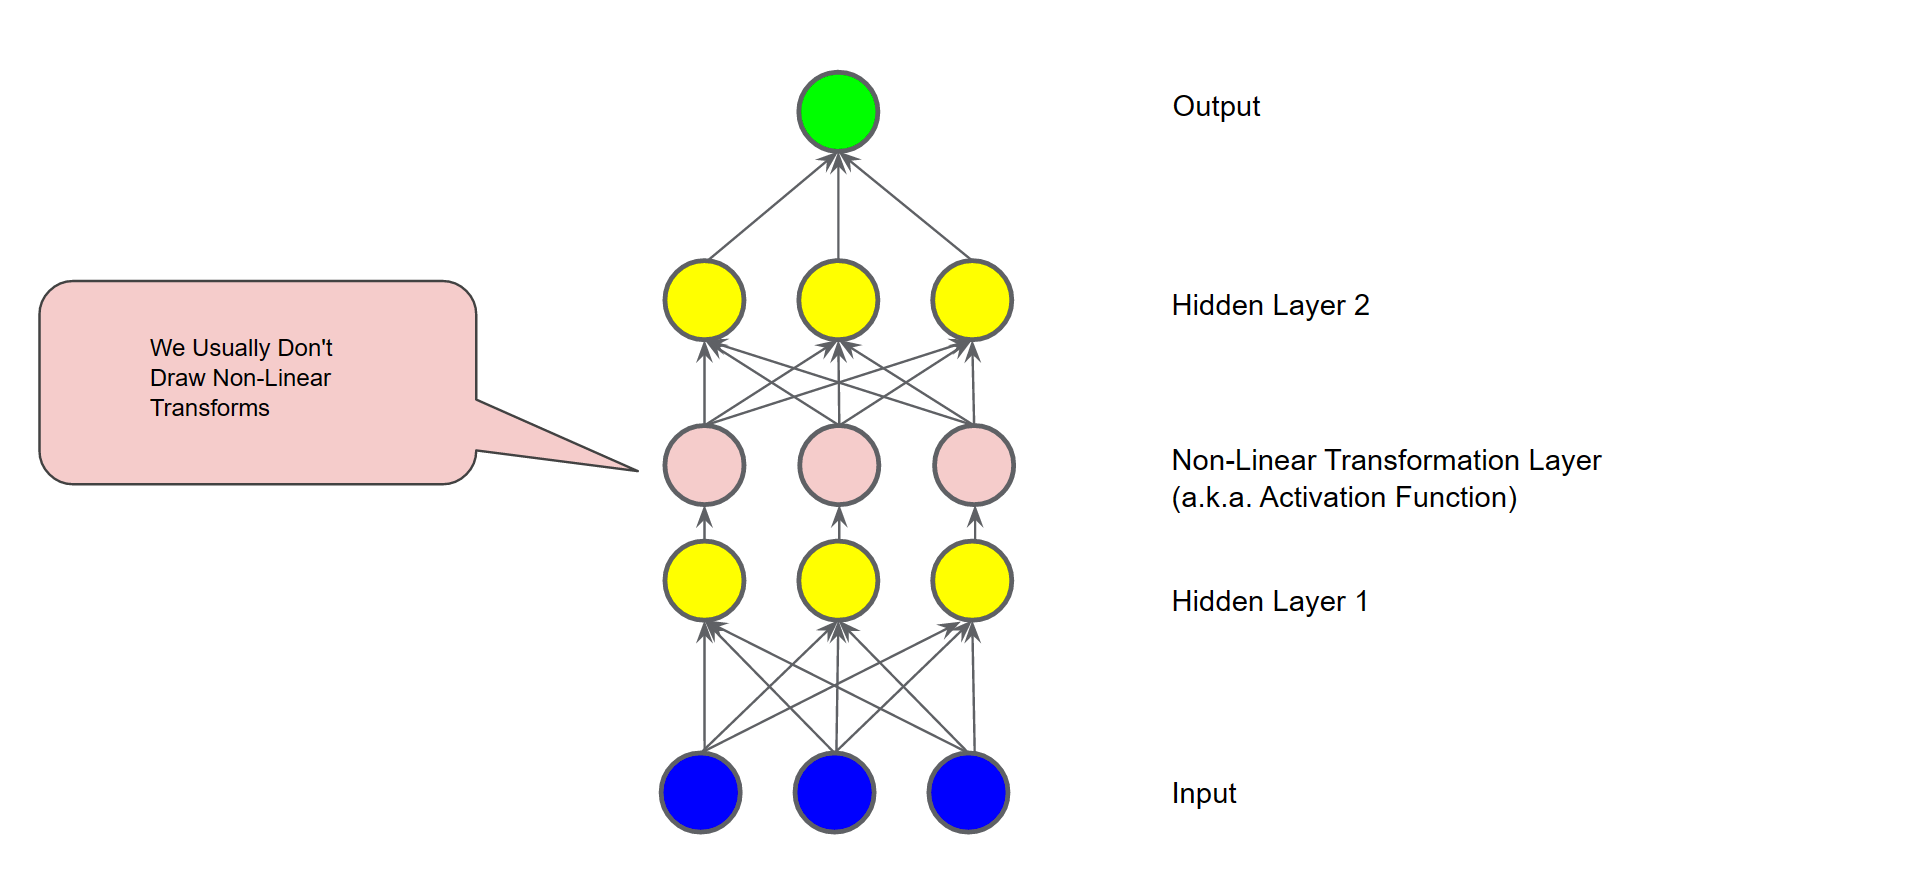

The first layer in blue is the input layer. Each node represents a feature for the data. The next layer in yellow represents a hidden layer which holds the weighted sums of the input layer. The weights tell the neural network how important the features are. A higher weight suggests higher importance. The hidden layer is split into 2 parts by a *non-linear function* called an __activation function__. 

#### Activation Function

Neural networks in general are meant to solve difficult problems. Alot of the times, these problems are __non-linear__. In the case of classification, there may be no line of the form $$ y = mx + b $$ that can be used as a decision surface to split the categories. Here is an example of a dataset that has a linear problem vs one with a non-linear problem:

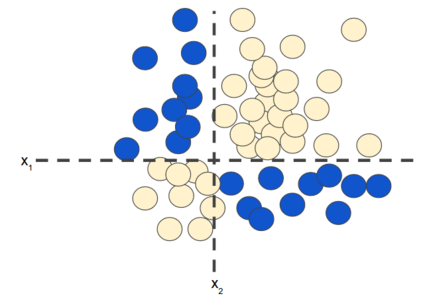

Here, the data can easily be split into different categories via straight lines.

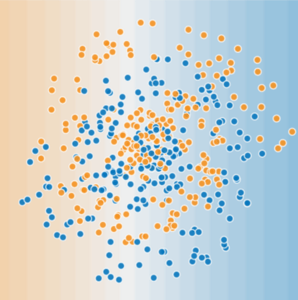

Here, it is not possible to split the data into different categories with straight lines.

This is where activation functions come in. When the data is summed with weights in the first part of the hidden layer, the data is transformed by the activation function. The activation function is a non-linear function that aids in helping the neural network account for more complex relationships that cannot be accounted for with linear functions. There are many examples of activation functions. A common one is called the __sigmoid function__:

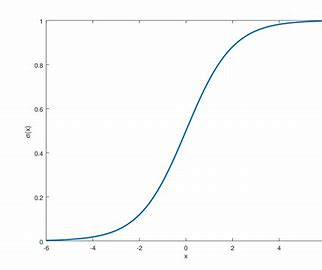

It is represented by the equation $$ F(x) = 1/1 + e^-x $$

It converts the weighted sum from the hidden layer to a value between 0 and 1. 

For more about the activation function in general, watch <a href = "https://www.youtube.com/watch?v=s-V7gKrsels">this</a> video. You can also refer to Lesson 7 on Supervised Learning.

#### Propagation

As mentioned earlier, __Propagation__ refers to how information moves through a neural network during training and the inference phase. There are two types of propagation.

__Forward Propagation__ refers to when the input is passed through each layer of the neural network, leading to an output. The network's weights in the hidden layers are updated based on the input, output, and gradient of the neural network. 

__Backpropagation__ refers to how the model is actually trained. This typically uses a process known as __Gradient Descent__. Refer to the lesson on __Supervised Learning__ for more information on Gradient Descent and gradients.

Essentially, the model uses a loss function to calculate how far the predicted outputs are from the actual labeled outputs. The model seeks to minimize loss so it compares the losses for each combination of weights, seeking the combination that yields the least loss.
Click <a href = "https://www.youtube.com/watch?v=Ilg3gGewQ5U">here</a> for more information about how propagation and the loss function work.



### Using PyTorch

__PyTorch__ is an open-source deep learning framework used for building and training neural networks. It provides a set of tools and functions that make it easier to work with large datasets and complex models. In simple terms, you can think of PyTorch as a powerful tool that helps you create neural networks and teach them how to perform specific tasks.

We will be using PyTorch for our Deep Learning work today.

#### Imports/Setup

Now that we have an understanding for the intuition behind neural networks, lets build our own. There are several different ways that a neural network can be developed. This is referred to as the __architecture__ of a neural network. For this lesson, we will be developing the Convolutionary Neural Network  (CNN)architecture to classify handwritten digits.

A CNN is a type of deep learning architecture that is primarily used for image-related tasks, such as image classification, object detection, and image segmentation. It is inspired by the human visual system and is designed to automatically and adaptively learn hierarchical patterns and features from images. 

First let's import the necessary packages: 

In [5]:
import torch
print(torch.__version__)

2.0.1+cpu


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib as plt

Here we imported pytorch and some relevant modules from pytorch. 

#### Loading Our Data

Now let's load our dataset. For this lesson, we will be using the MNIST dataset for our digit classification.

We first want to transform our dataset into a __tensor__. A __tensor__ in PyTorch is a multi-dimensional array, similar to numpy arrays. Then we normalize our tensor so that the data has a mean and standard deviation of .5. Lastly, we split our data into training and testing datasets. In PyTorch, data is fed into the model in __batches__ rather than all at once. Making a 'train_loader' and a 'test_loader' set allows us to control the batch sizes that the data is fed in.

In [7]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)


7.6%

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


100.0%
31.8%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100.0%
100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



#### Defining Our CNN

To define our CNN, we make a class with 2 functions. The first function is our constructor that instantiates our CNN structure. This allows us to define things like the pooling layers, the convolution process, and more. Don't worry about understanding what these mean for now. We will go in depth on the components of a CNN in our next lesson. 

In [14]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(32 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, 10)  # 10 classes for 10 digits (0-9)

    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 32 * 14 * 14)  # flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

The second function of our class allows us to define the forward propagation process. Recall that forward propagation refers to the forward pass of data through the many layers of a neural network.

Now we can instantiate a CNN object using the class we just created.

In [15]:
model = SimpleCNN()

#### Setting Up the Loss and Optimizer

In this next step, we want to set up our loss function as well as the process for minimizing our loss. Recall from the __Supervised Learning__ lesson that __loss__ is how far our predictions are from the real label. We seek to minimize loss through a process called __Gradient Descent__ (once again, refer to the Supervised Learning lesson) which serves as our means of optimizing our model.

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0008, momentum=0.9)

#### Training Our CNN

To train our CNN, we loop over our dataset multiple times (epochs). Each __epoch__ represents a full forward and backward pass of all training samples.
Within each epoch, we iterate through the training data in mini-batches provided by 'train_loader'.

In [19]:
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

print('Finished Training')


Epoch 1, Loss: 0.5074564042170843
Epoch 2, Loss: 0.19467791426479816
Epoch 3, Loss: 0.13499600806857148
Epoch 4, Loss: 0.1030676524532338
Epoch 5, Loss: 0.08599446296617388
Epoch 6, Loss: 0.07405057026681801
Epoch 7, Loss: 0.06534656117198367
Epoch 8, Loss: 0.05846029268677036
Epoch 9, Loss: 0.05310511088923862
Epoch 10, Loss: 0.04860904452440639
Finished Training


<span style = "background-color: yellow">
TODO: Now that we trained our model, your code should have output the loss for every epoch. Evaluate the trend of the loss over time. Is it decreasing? Increasing? Both? For the conclusion that you decide upon, explain to your peers why that is the trend of your loss and if it makes sense based on what we learned. (Hint: Keep in mind what we have learned regarding Backprogation and Gradient Descent.) 
</span>

#### Testing Our CNN

As always in Machine Learning, we want to test our trained model on new data (training set). 

In [20]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on 10,000 test images: {100 * correct / total}%')


Accuracy on 10,000 test images: 98.34%


<span style = "background-color: yellow">
TODO: Discuss with your peers about what their accuracy was. Why do you think you had the accuracy you did? 
</span>